In this notebook we try to replicate [Discovering Conservation Laws using Optimal Transport and Manifold Learning](https://doi.org/10.48550/arxiv.2208.14995).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

### Generate trajectories

In [3]:
%mkdir -p trajectories/coupled_oscillator
%mkdir -p trajectories/double_pendulum
%mkdir -p trajectories/harmonic_oscillator
%mkdir -p trajectories/pendulum
%mkdir -p trajectories/kepler_problem
%mkdir -p trajectories/three_body_problem

ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.



Creating trajectories for pendulum


4000it [03:20, 19.96it/s]



Creating trajectories for harmonic_oscillator


4000it [00:17, 222.32it/s]



Creating trajectories for kepler_problem


4000it [00:16, 241.20it/s]



Creating trajectories for coupled_oscillator


4000it [00:29, 134.45it/s]


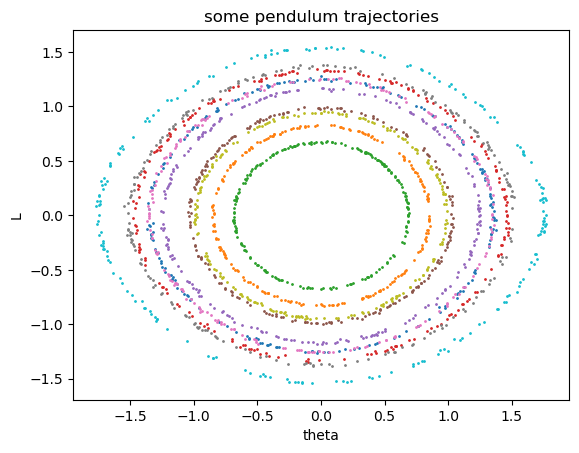

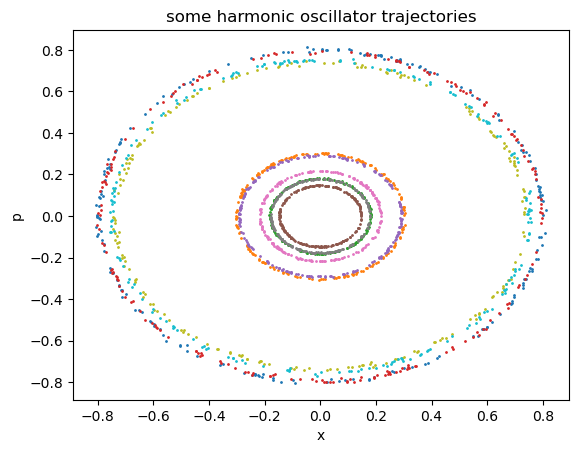

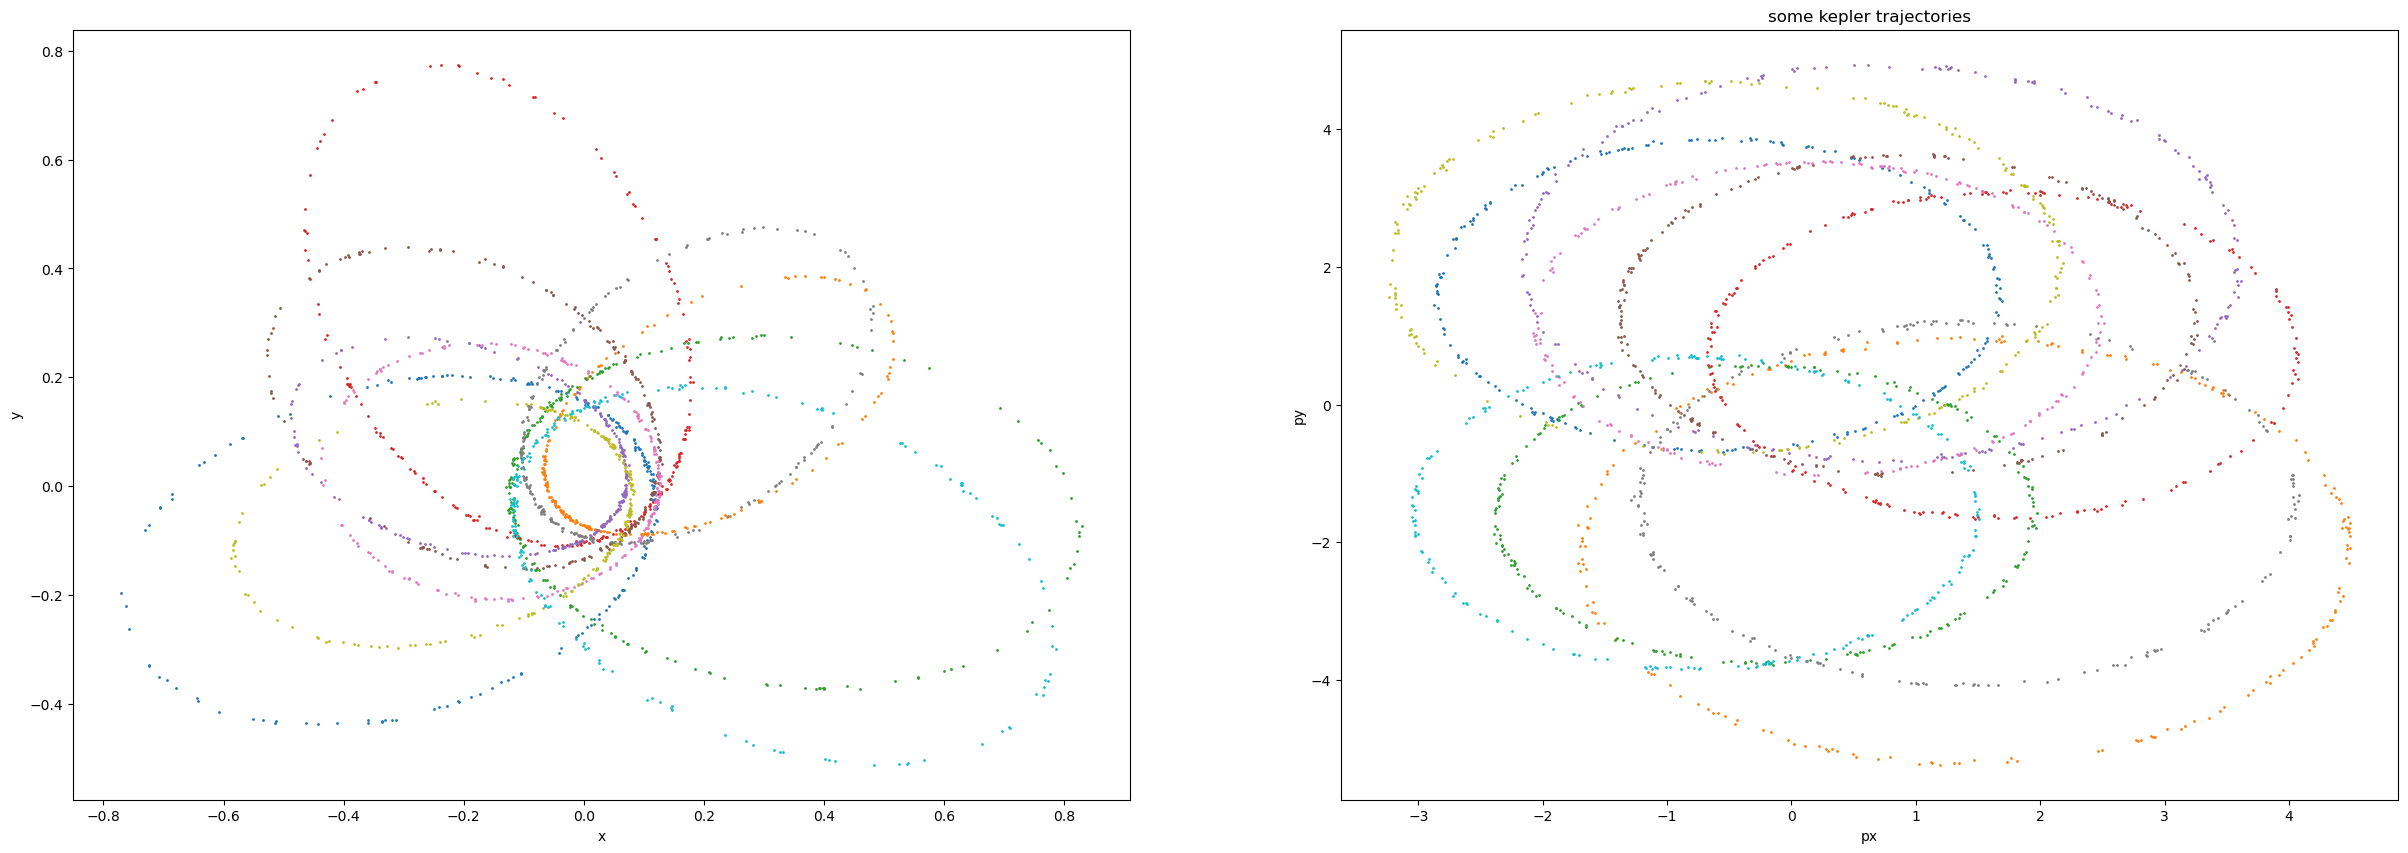

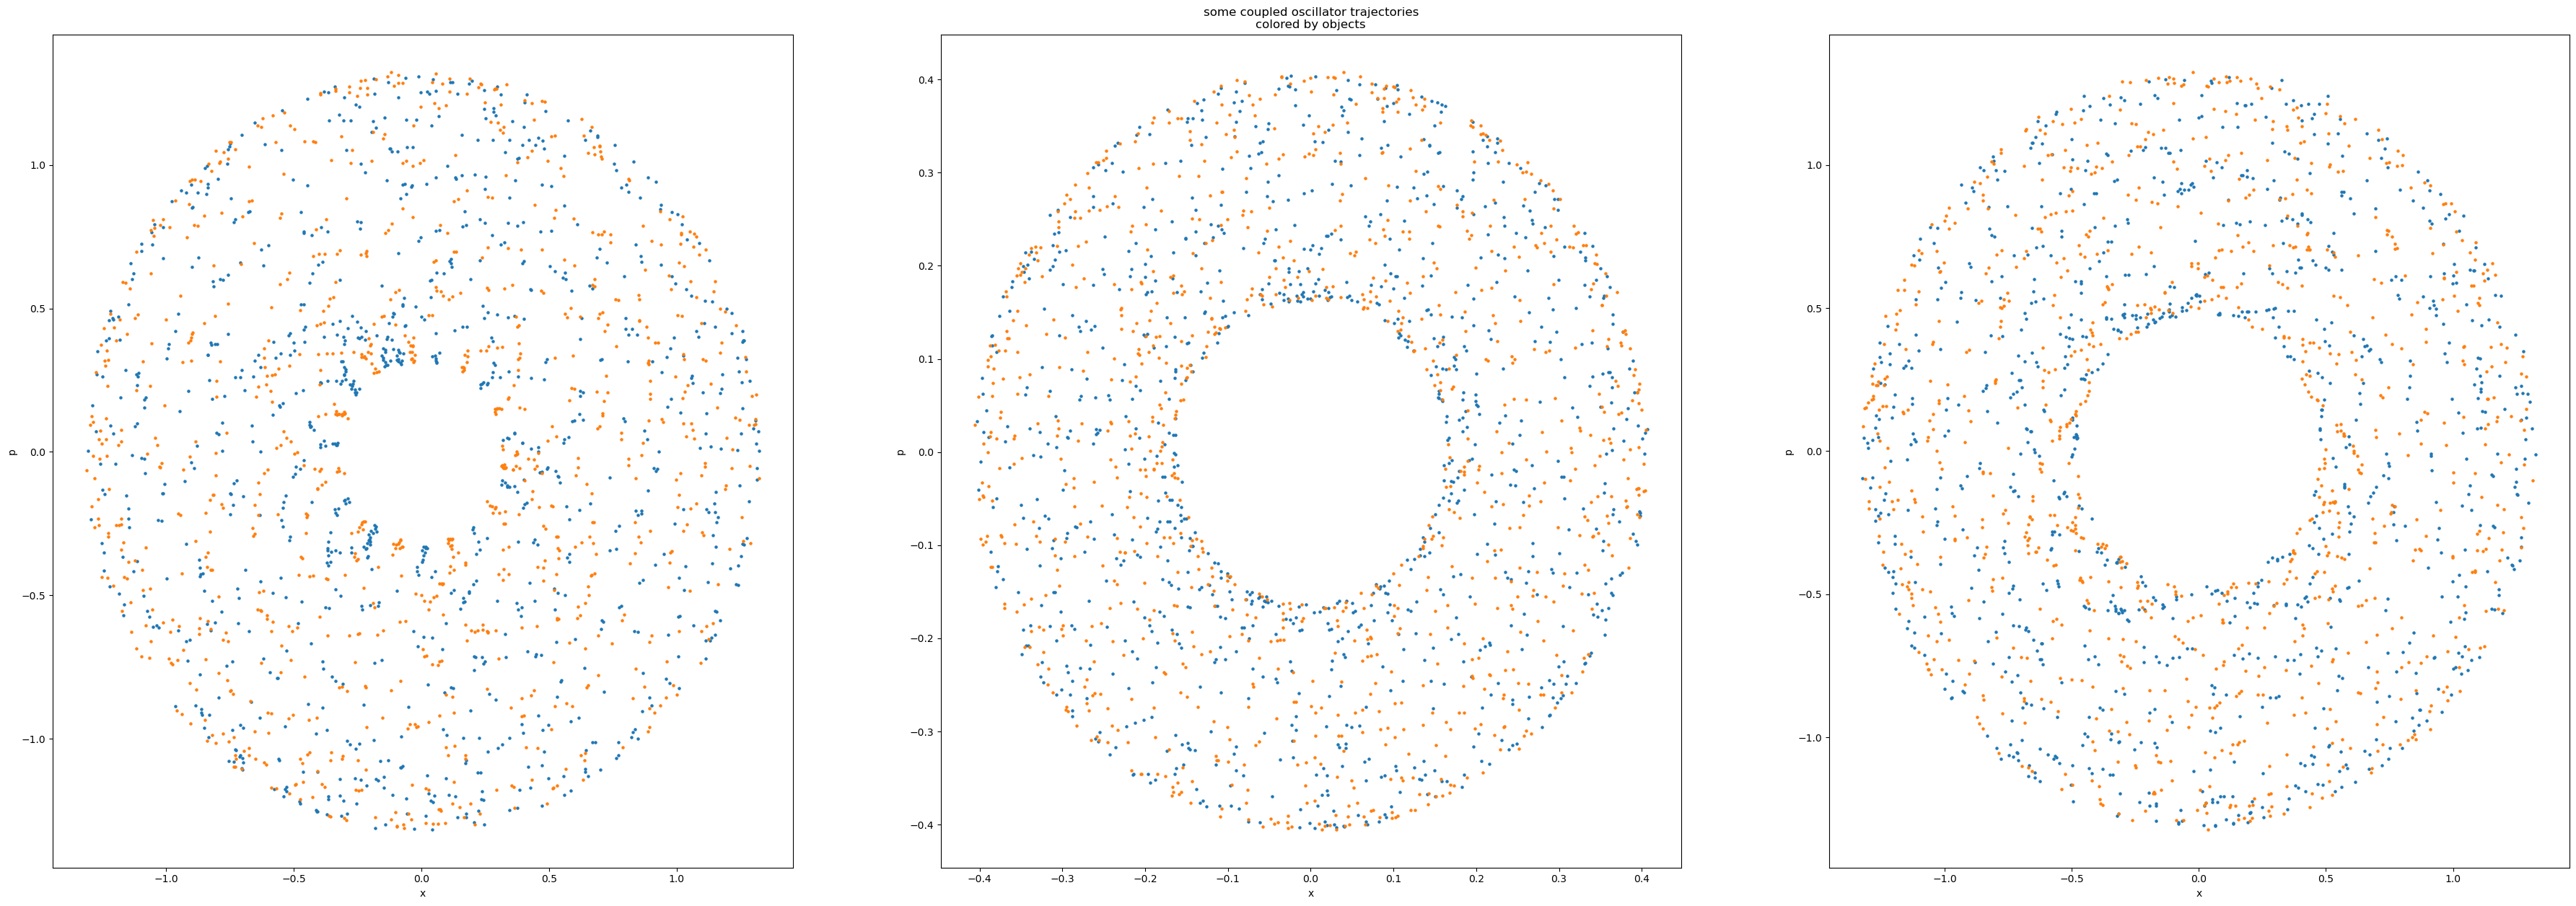

In [4]:
import creating.pendulum as pend
import creating.harmonic_oscillator as ho
import creating.kepler_problem as kp
import creating.double_pendulum as dp
import creating.coupled_oscillator as co


pend.create_trajectories(4000)
ho.create_trajectories(4000)
kp.create_trajectories(4000)
dp.create_trajectories(1000)
co.create_trajectories(4000)

## Use spectral embedding

In [2]:
import utils

### Pendulum

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


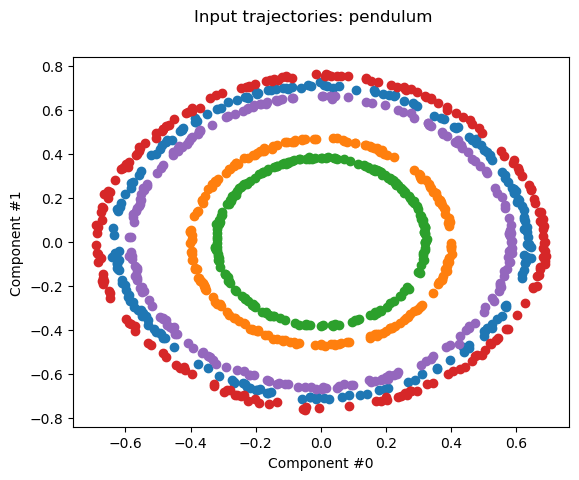

In [3]:
data_p = utils.get_data("pendulum", plot_config=[(0, 1)])

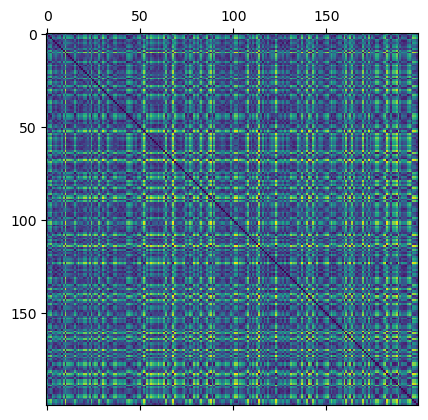

In [4]:
W_P = utils.gen_dist_matrix(data_p)
plt.matshow(W_P)

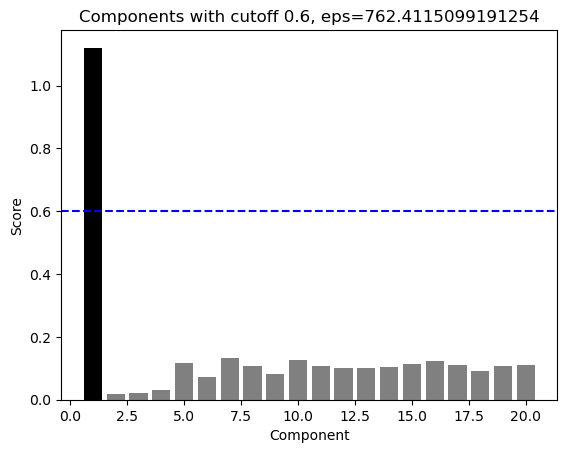

In [5]:
scores, embedding, embed_list = utils.spectral_embedding(W_P, n_neighbors=20)

## Harmonic oscillator

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


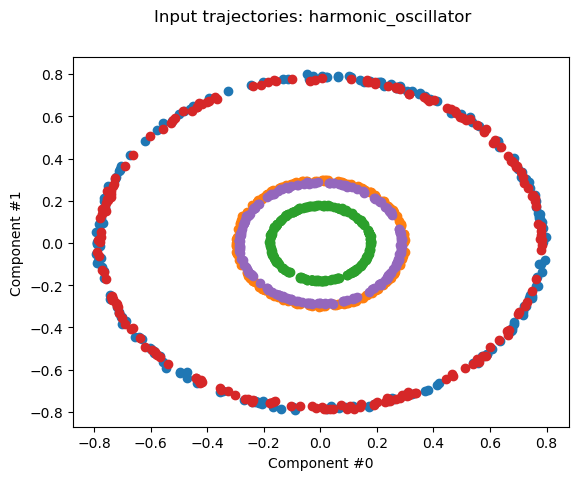

In [6]:
data_h = utils.get_data("harmonic_oscillator", plot_config=[(0, 1)])

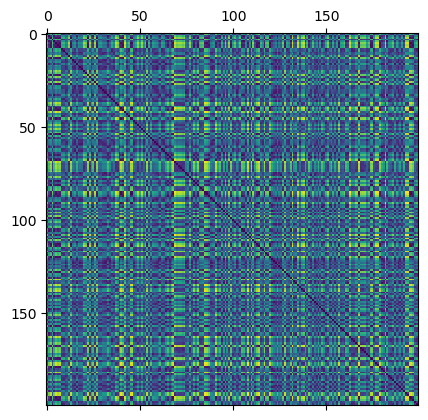

In [7]:
W_H = utils.gen_dist_matrix(data_h)
plt.matshow(W_H)

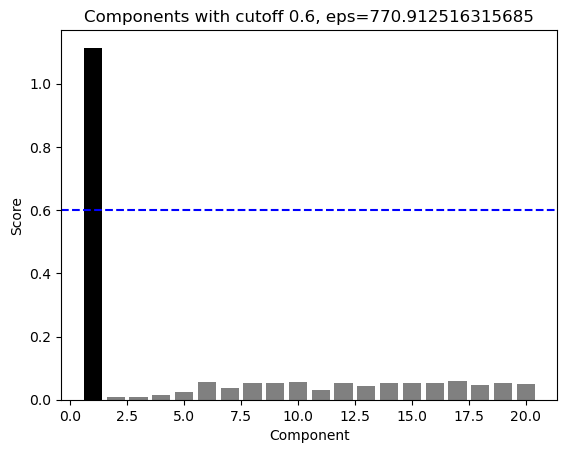

In [8]:
scores, embedding, embed_list = utils.spectral_embedding(W_H, n_neighbors=20)

## Double pendulum

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


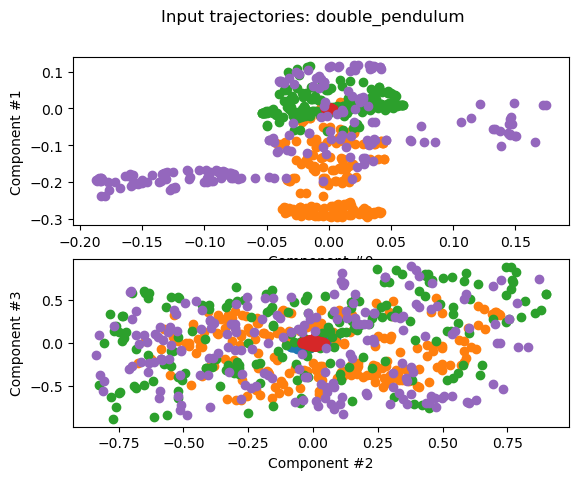

In [9]:
data_dp = utils.get_data("double_pendulum", plot_config=[(0, 1), (2, 3)])

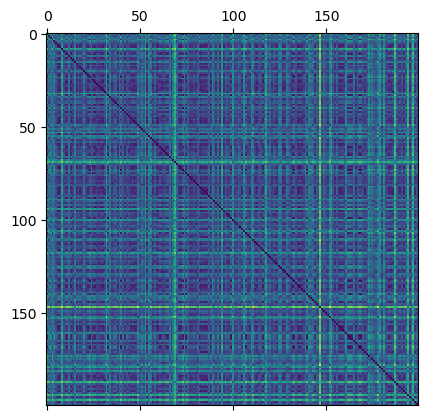

In [10]:
W_DP = utils.gen_dist_matrix(data_dp)
plt.matshow(W_DP)

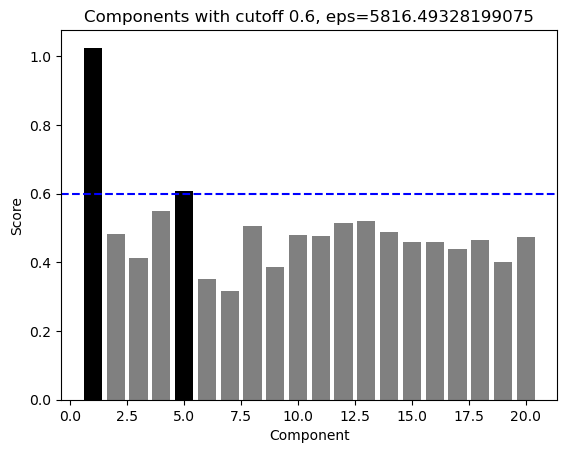

In [29]:
scores, embedding, embed_list = utils.spectral_embedding(W_DP, n_neighbors=100)

## Coupled oscillator

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


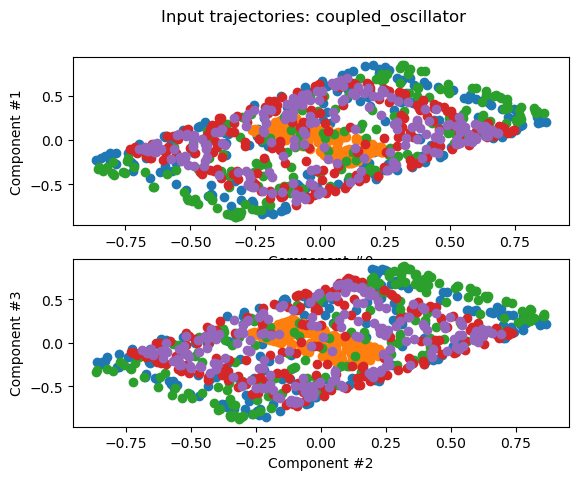

In [12]:
data_co = utils.get_data("coupled_oscillator", plot_config=[(0, 1), (2, 3)])

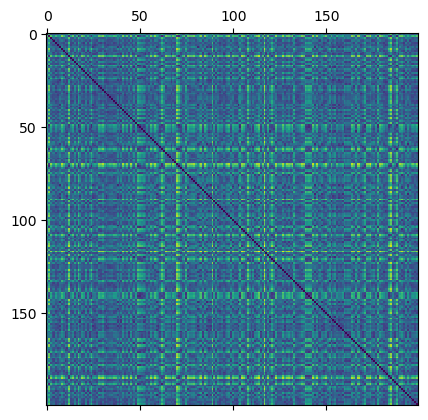

In [13]:
W_CO = utils.gen_dist_matrix(data_co)
plt.matshow(W_CO)

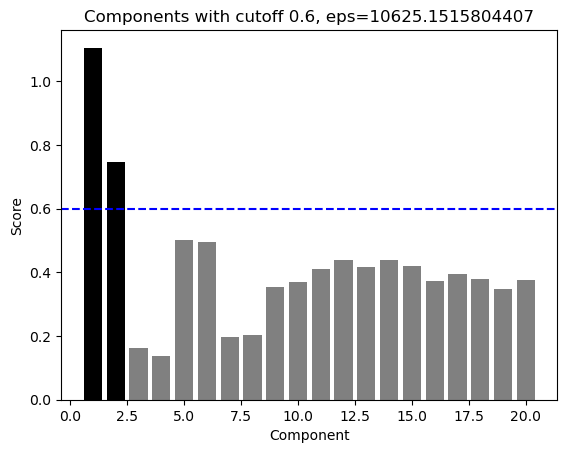

In [30]:
scores, embedding, embed_list = utils.spectral_embedding(W_CO, n_neighbors=100)

## Kepler problem

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


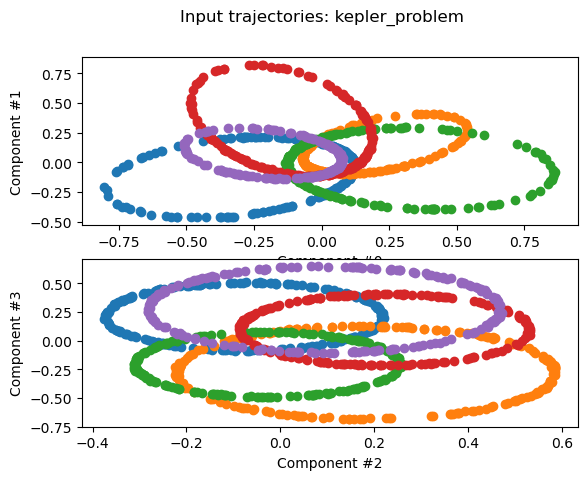

In [15]:
data_kp = utils.get_data("kepler_problem", plot_config=[(0, 1), (2, 3)])

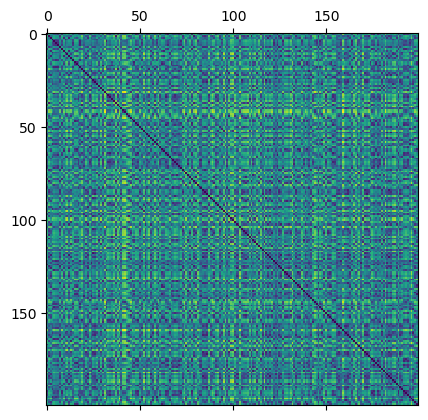

In [16]:
W_KP = utils.gen_dist_matrix(data_kp)
plt.matshow(W_KP)

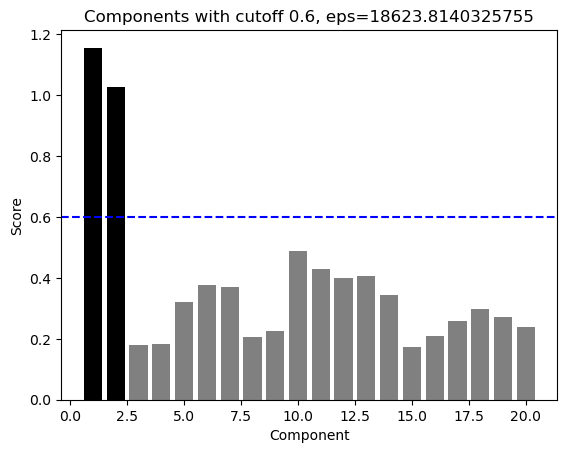

In [31]:
scores, embedding, embed_list = utils.spectral_embedding(W_KP, n_neighbors=100)

## Three body problem

In [21]:
# data_tbp = utils.get_data("three_body_problem", plot_config=[(0, 1), (2, 3)]) # TODO

In [22]:
# W_TBP = utils.gen_dist_matrix(data_tbp)
# plt.matshow(W_TBP)

In [23]:
# scores, embedding, embed_list = utils.spectral_embedding(W_TBP, n_neighbors=40)

## Dependence of embedding size on `n_neighbors`

In the above calculations we have used `n_neighbors` hyperparameter, but it is not clear where it comes from. Original paper seemingly just comes up with the right value. The only mention of this problem is about the dependant parameter $\epsilon$:

> we find this heuristic to be less sensitive to the choice of $\epsilon$ in the kernel.

So in this section we try to show how sensitive is the heuristic to $\epsilon$.

In [18]:
def calc_embed_sizes(W, n_neighbors_range):
    res = []
    for n_neighbors in tqdm(n_neighbors_range):
        _, _, embed_list = utils.spectral_embedding(W, n_neighbors=n_neighbors, do_plot=False)
        res.append(len(embed_list))
    return res

In [19]:
def try_n_neighbors(W, expected_embed_size: int, experiment_name: str, n_neighbors_range = range(4, 198)):
    embed_sizes = calc_embed_sizes(W, n_neighbors_range)
    colors = ['green' if x == expected_embed_size else 'grey' for x in embed_sizes]
    plt.bar(n_neighbors_range, embed_sizes, color=colors, width=1)
    plt.title(f"Embedding size for {experiment_name} with different n_neighbors. Expected: {expected_embed_size}")

### Pendulum

[Soljacic code](https://github.com/peterparity/conservation-laws-manifold-learning/blob/master/pendulum.ipynb)

Soljacic uses `n_components=20`

  0%|          | 0/194 [00:00<?, ?it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
  1%|          | 2/194 [00:00<00:10, 18.33it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
  2%|▏         | 4/194 [00:00<00:10, 18.30it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx

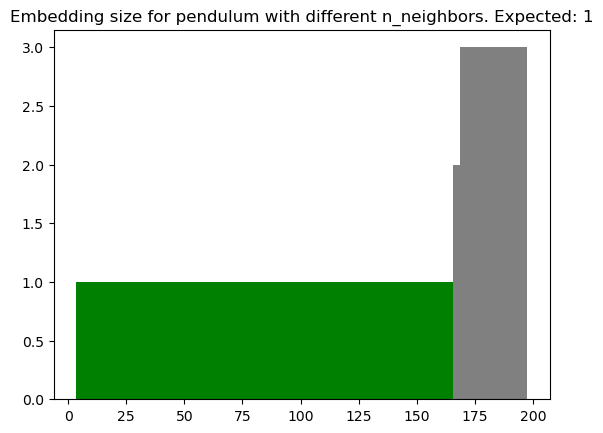

In [20]:
try_n_neighbors(W_P, 1, "pendulum")

### Harmonic oscillator

[Soljacic code](https://github.com/peterparity/conservation-laws-manifold-learning/blob/master/sho.ipynb)

Soljacic uses `n_components=20`

  0%|          | 0/194 [00:00<?, ?it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
  3%|▎         | 5/194 [00:00<00:04, 45.40it/s]C:\Users\waleko\Documents\Projects

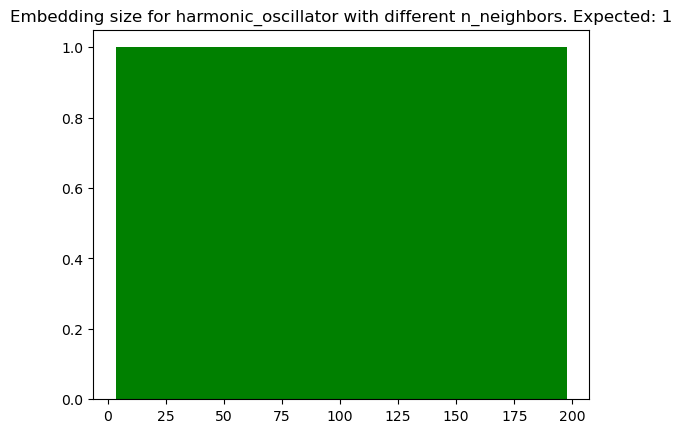

In [21]:
try_n_neighbors(W_H, 1, "harmonic_oscillator")

### Double pendulum

[Soljacic code](https://github.com/peterparity/conservation-laws-manifold-learning/blob/master/double_pendulum.ipynb)

Soljacic uses `n_components=50`

  0%|          | 0/194 [00:00<?, ?it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
  1%|          | 2/194 [00:00<00:16, 11.54it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
  3%|▎         | 5/194 [00:00<00:1

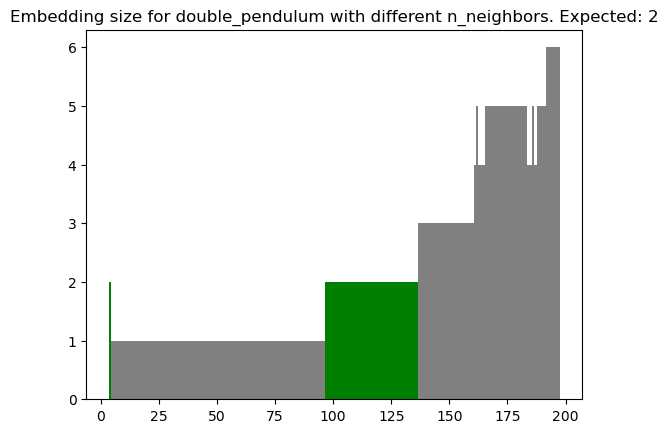

In [22]:
try_n_neighbors(W_DP, 2, "double_pendulum")

### Coupled oscillator

Not in Soljacic

100%|██████████| 194/194 [00:11<00:00, 16.83it/s]


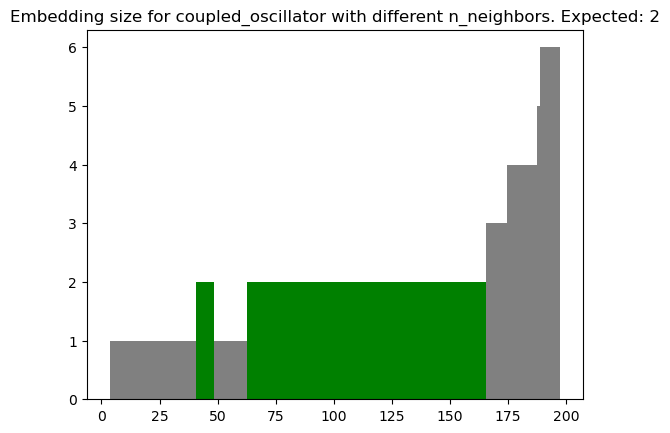

In [23]:
try_n_neighbors(W_CO, 2, "coupled_oscillator")

### Kepler problem

[Soljacic code](https://github.com/peterparity/conservation-laws-manifold-learning/blob/master/planar_orbits.ipynb)

Soljacic uses `n_components=200`

  0%|          | 0/194 [00:00<?, ?it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:80: RuntimeWarning: invalid value encountered in sqrt
  weights[relevant_idx] = np.sqrt(
100%|██████████| 194/194 [00:09<00:00, 21.13it/s]


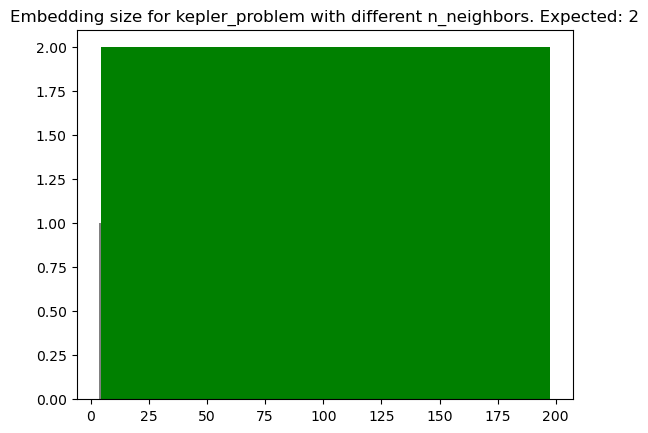

In [28]:
try_n_neighbors(W_KP, 2, "kepler_problem")

## Batched dependance

As we can see the plots are not very continous, so we have generated 20 batches of 200 trajectories with 200 points, and then took an average of the dimentionality over the batches.

In [25]:
def calc_embed_sizes_batched(Ws, n_neighbors_range):
    res = []
    for n_neighbors in tqdm(n_neighbors_range):
        tmp = utils.batch_spectral_embedding(Ws, n_neighbors=n_neighbors, do_plot=False)
        embed_size = np.mean([len(x[2]) for x in tmp])
        res.append(embed_size)
    return res

In [26]:
def try_n_neighbors_batched(Ws, expected_embed_size: int, experiment_name: str, n_neighbors_range = range(4, 198)):
    embed_sizes = calc_embed_sizes_batched(Ws, n_neighbors_range)
    colors = ['green' if abs(x - expected_embed_size) < 0.5 else 'grey' for x in embed_sizes]
    plt.bar(n_neighbors_range, embed_sizes, color=colors, width=1)
    plt.title(f"Mean embedding size for {experiment_name} with different n_neighbors. Expected: {expected_embed_size}")

### Pendulum

In [ ]:
data_p_batches = utils.batch_get_data("pendulum", n_batches=20)
Ws_p = [utils.gen_dist_matrix(x) for x in data_p_batches]
try_n_neighbors_batched(Ws_p, 1, "pendulum")

### Harmonic oscillator

In [ ]:
data_h_batches = utils.batch_get_data("harmonic_oscillator", n_batches=20)
Ws_h = [utils.gen_dist_matrix(x) for x in data_h_batches]
try_n_neighbors_batched(Ws_h, 1, "harmonic_oscillator")

### Double pendulum

In [ ]:
data_dp_batches = utils.batch_get_data("double_pendulum", n_batches=5)
Ws_dp = [utils.gen_dist_matrix(x) for x in data_dp_batches]
try_n_neighbors_batched(Ws_dp, 2, "double_pendulum")

### Coupled oscillator

In [ ]:
data_co_batches = utils.batch_get_data("coupled_oscillator", n_batches=20)
Ws_co = [utils.gen_dist_matrix(x) for x in data_co_batches]
try_n_neighbors_batched(Ws_co, 2, "coupled_oscillator")

### Kepler problem

In [ ]:
data_kp_batches = utils.batch_get_data("kepler_problem", n_batches=20)
Ws_kp = [utils.gen_dist_matrix(x) for x in data_kp_batches]
try_n_neighbors_batched(Ws_kp, 3, "kepler_problem")